In [37]:
# Imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import exposure


# **Calibración del histograma (o expansión del contraste)**

# **Comparación entre diferentes transformaciones del histograma**

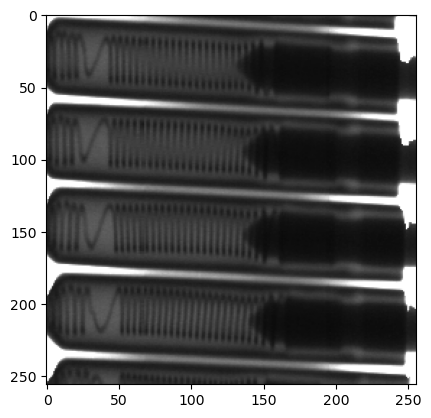

In [38]:
bougies = cv2.imread('images/BOUGIES.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(bougies, vmin=0, vmax=255, cmap='gray')
plt.show()

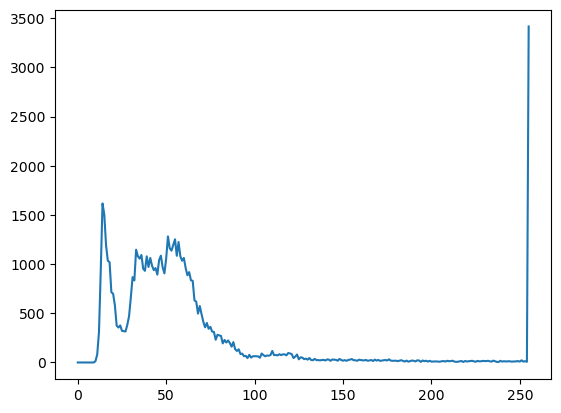

Mínimo: 10, Máximo: 255


In [39]:
hist = cv2.calcHist([bougies],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()
miniomo = np.min(bougies)
maxiomo = np.max(bougies)
print(f'Mínimo: {miniomo}, Máximo: {maxiomo}')

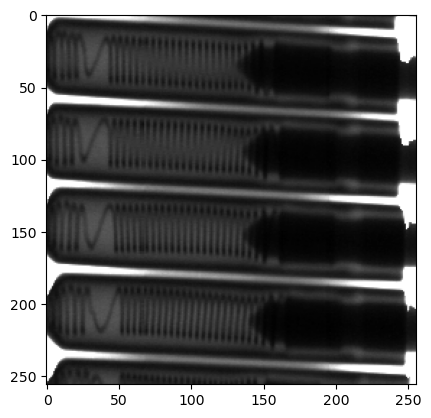

In [40]:
bougieRescaled = exposure.rescale_intensity(bougies, in_range=(10,255), out_range=(0,255))
bougieRescaled = bougieRescaled.astype(np.uint8)
plt.imshow(bougieRescaled, vmin=0, vmax=255, cmap='gray')
plt.show()


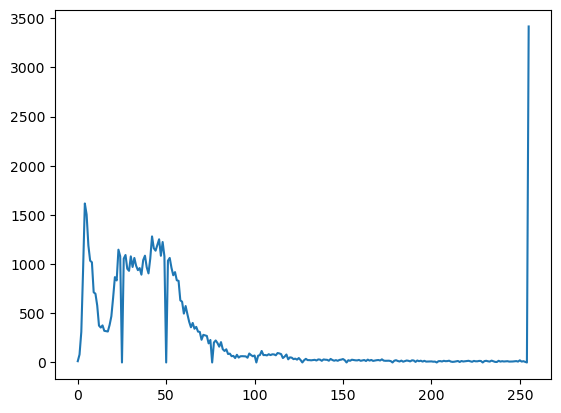

In [41]:
hist = cv2.calcHist([bougieRescaled],[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

## **¿A qué se debe este resultado?**

**Respuesta**

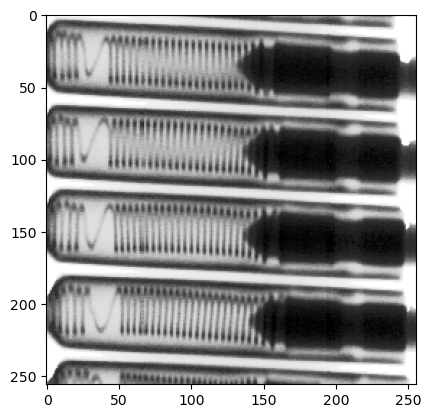

In [42]:
bougieEcualizado = cv2.equalizeHist(bougies)
plt.imshow(bougieEcualizado, vmin=0, vmax=255, cmap='gray')
plt.show()

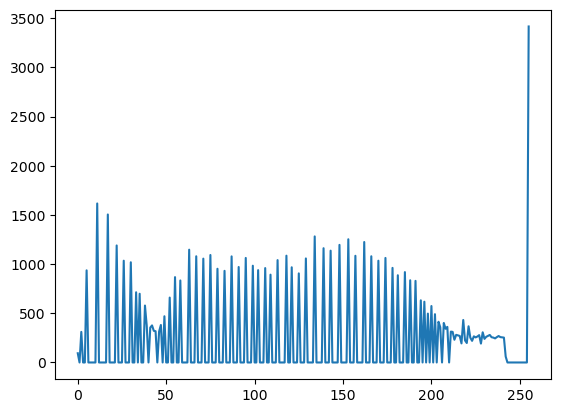

In [43]:
histBougieEcualizado = cv2.calcHist([bougieEcualizado],[0],None,[256],[0,256])
plt.plot(histBougieEcualizado)
plt.show()

**Compare las imágenes resultado de la expansión (punto anterior) y de la ecualización (resultado actual), junto con sus histogramas. Comente sus observaciones.**

## **Comparacion**

C:\Users\santi\AppData\Local\Temp\ipykernel_37740\87853339.py:5: RuntimeWarning: overflow encountered in scalar add
  bougieLog[i,j] = np.log1p(bougies[i,j] + 1)


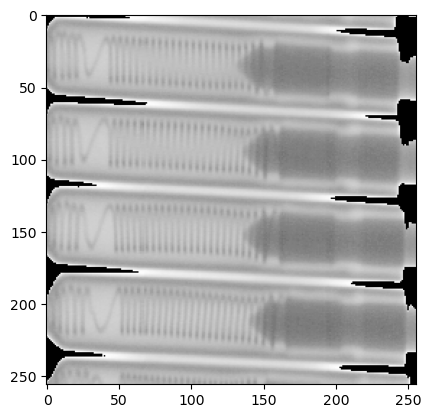

In [46]:
bougieLog = np.zeros(bougies.shape)

for i in range(bougies.shape[0]):
    for j in range(bougies.shape[1]):
        bougieLog[i,j] = np.log1p(bougies[i,j] + 1)

bougieMultiply = cv2.multiply(bougieLog, 46)
bougieMultiply = bougieMultiply.astype(np.uint8)

plt.imshow(bougieMultiply, vmin=0, vmax=255, cmap='gray')
plt.show()

**Responder**
¿Por qué es necesario multiplicar la imagen de salida por un factor?

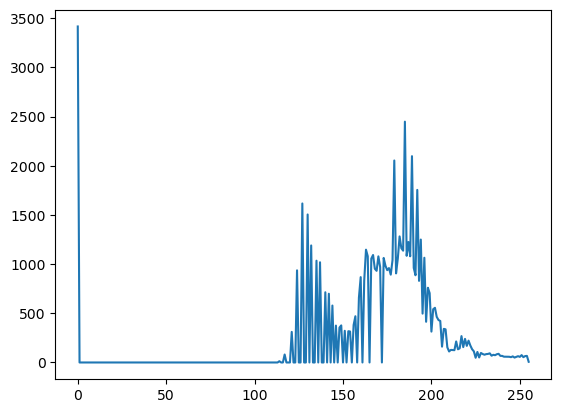

In [ ]:
histBougieMulty = cv2.calcHist([bougieMultiply],[0],None,[256],[0,256])
plt.plot(histBougieMulty)

**¿Cómo es el histograma resultado?**

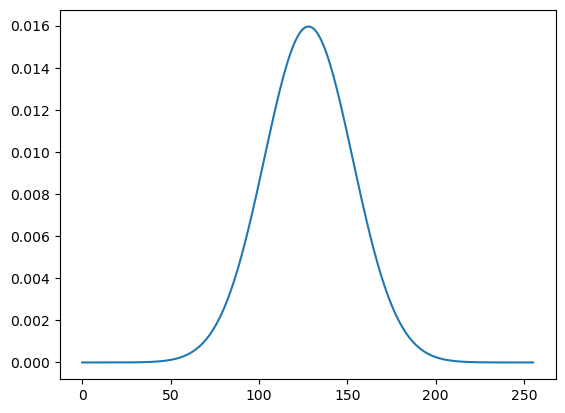

In [ ]:
#Crear el histograma normal con forma de campana 
L = 256
x = np.arange(L)

mu = 128 # media 
sigma = 25 # desviación 
hist_normal = np.exp(-0.5 * ((x - mu) / sigma)**2)
hist_normal = hist_normal / hist_normal.sum() # normalizar a suma 1
plt.plot(x, hist_normal)

In [ ]:
# Especificacion del histograma

N, M = bougies.shape
#Generamos la distribución acumulativa del histograma
cdf = np.cumsum(hist_normal)
#Generamos un arreglo con valores aleatorios según la distribución
pixel_values  = np.interp(np.random.rand(N*M), cdf, range(0,L))
#Convertimos el arreglo en una imagen.
i_to_match= pixel_values.reshape(N,M).astype(np.uint8)
matched_image = exposure.match_histograms(bougies, i_to_match)


[[232.         232.         232.         ... 157.52342159 156.76068376
  156.52564103]
 [232.         232.         232.         ... 165.37662338 164.690625
  164.3125    ]
 [232.         232.         232.         ... 232.         232.
  232.        ]
 ...
 [232.         165.46428571 118.28884462 ... 232.         232.
  232.        ]
 [160.65947242 121.0872549  114.1659436  ... 232.         232.
  232.        ]
 [128.         117.21041879 114.1659436  ... 232.         232.
  232.        ]]


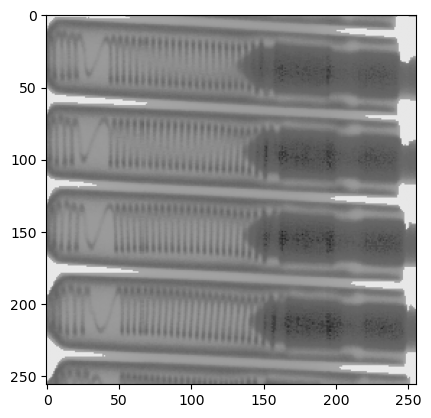

In [ ]:
matched_image = matched_image.astype(np.uint8)
plt.imshow(matched_image, vmin=0, vmax=255, cmap='gray')
plt.show()

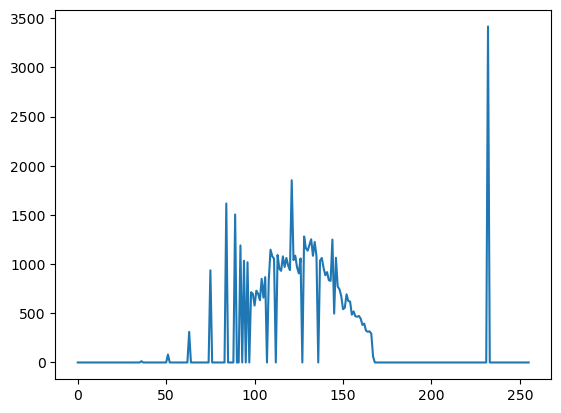

In [ ]:
histMatched = cv2.calcHist([matched_image],[0],None,[256],[0,256])
plt.plot(histMatched)


**Observaciones sobre los histogrmas**

**Haga una comparación entre los tipos de transformaciones ¿Qué impactos tiene cada una? ¿Cómo  pueden ser usadas en el ámbito de mejoramiento de la calidad de la imagen?**